<a href="https://colab.research.google.com/github/chicolucio/pH-diagrams/blob/master/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tutorial do programa pH Diagrams**

<!-- TODO colocar um gif das animações -->
![gif_introducao](https://raw.githubusercontent.com/chicolucio/pH-diagrams/master/images/animation.gif)

Ácidos e bases são duas das funções químicas mais importantes estando presentes em vasto número de reações laboratoriais, industriais e nos organismos vivos. Existem três Teorias Ácido-Base mais simples para aprimorar o entendimento destas funções.

De acordo com Arrhenius, ácidos liberam átomos de hidrogênio como cátions e bases liberam hidroxilas como ânions em meio aquoso. A Teoria de Bronsted-Lowry diz que ácidos são substâncias que doam prótons, enquanto que bases recebem prótons. Já a Teoria de Lewis classifica como ácidos espécies que recebem elétrons e como bases as que doam elétrons. No contexto deste trabalho, a teoria mais relevante é a de Bronsted-Lowry.

A depender da reação e seu comportamento, a diferença do ácido para base será o número de prótons formando, assim,  pares conjugados. Na figura abaixo, por exemplo, a reação entre $HCl$ e $H_2O$ resulta na perda do próton do ácido clorídrico formando $Cl^-$ e na protonação da água, formando $H_3O^+$. No caso da reação com amônia e água, ocorre a desprotonação de $H_2O$ formando a hidroxila. Um exemplo interessante é o comportamento da reação entre dois ácidos, $HCl$ e $CH_3COOH$. O ácido acético, por ser mais fraco comparado ao ácido clorídrico, comporta-se como base neste caso.

![imagem_pares_conjugados](https://raw.githubusercontent.com/chicolucio/pH-diagrams/master/images/conjugated_pairs.png)

A força de um ácido ou de uma base pode ser comparada quantitativamente por meio da constante de acidez ($K_a)$ e de basicidade ($K_b$). As duas equações a seguir são para ácidos monopróticos, $HA$, ou uma base que pode receber um próton. Sendo ácidos o foco deste trabalho, é importante salientar que a representação geral $HA$ trata-se de sua forma monoprótica protonada e $A^-$ sua forma desprotonada.

$$
K_a = \frac{[H_3O^+][A^-]}{[HA]} 
\qquad
K_b = \frac{[B^+][OH^-]}{[BOH]} 
$$

As espécies entre colchetes representam as concentrações molares. Desta forma, o valor de $K_a$ e $K_b$ é diretamente proporcional à concentração iônica. Logo, quanto maior o valor de $K_a$ ou $K_b$, maior será sua ionização e a força do ácido ou base, respectivamente.

Para ácidos e bases fortes, ou seja, completamente dissociados, $K_a \rightarrow \infty$. Neste caso, é necessária a utilização de um solvente que seja ácido fraco para medir a força da base ou uma base fraca para medir a força do ácido.


Posto isto, podemos calcular o grau de ionização $α$ (alfa) de ácidos, por exemplo, a fim de descobrir a porcentagem de moléculas do ácido dissolvido que efetivamente sofrem ionização.

$$
\alpha = \frac{\text{nº moléculas ionizadas}}
{\text{nº moléculas dissolvidas}}
$$

A fórmula acima é utilizada para calcular o $α$ correspondente a um único valor de $pH$.

Realizando a conta acima para toda a faixa de $pH$ de interesse, temos o gráfico de distribuição de espécies que relaciona o $α$ em função do  $pH$ e também do logaritmo da concentração em função do  $pH$ que demonstra a dependência destas duas propriedades. Os diagramas de  $pH$ permitem ao aluno compreender graficamente o equilíbrio ácido-base.

O programa `pH_diagrams` desenvolvido neste projeto mostra como conseguimos construir os diagramas de $pH$ e interpretá-los.


# **Usando o pacote com exemplo de ácido monoprótico**

Primeiro, vamos importar o construtor de ácidos `Acid` do pacote `ph_diagram`:

In [ ]:
!git clone https://github.com/chicolucio/pH-diagrams &> /dev/null
%cd -q pH-diagrams
!pip install chempy -q &> /dev/null

import numpy as np
np.set_printoptions(threshold=10, linewidth=100, precision=4)

from ph_diagram import Acid

Podemos criar um ácido passando os valores de $pK_a$ na forma de uma tupla e a concentração correspondente. 

Usaremos como exemplo de ácido monoprótico o ácido acético.

In [ ]:
acetic_acid = Acid((4.76,), 0.1)


$$
CH_3COOH(aq) + H_2O(l) \rightleftharpoons CH_3COO^-(aq) + H_3O^+(aq)
$$

Em termos gerais, sabemos que $CH_3COOH$ se trata da espécie protonada e $CH_3COO^-$ da espécie desprotonada. Entretanto, a fim de facilitar o entendimento do aluno, manteremos como padrão $HA$ sendo a espécie protonada e $A{^-}$ a desprotonada.

O $α$ e o logaritmo da concentração podem ser facilmente confirmados:

In [ ]:
acetic_acid.alpha

[array([9.9998e-01, 9.9998e-01, 9.9997e-01, ..., 9.1201e-10, 7.2444e-10, 5.7544e-10]),
 array([1.7378e-05, 2.1877e-05, 2.7542e-05, ..., 1.0000e+00, 1.0000e+00, 1.0000e+00])]

O programa foi desenvolvido para obter os valores de $α$ em toda a faixa de $pH$, de 0 a 14, com intervalos de 0,1. Em consequência, não obtivemos um único valor de $α$, mas 140. Acima foram mostrados apenas os 3 primeiros e os 3 últimos valores de $α$ para cada espécie do ácido. Por se tratar de um monoprótico, os valores correspondem às duas espécies presentes

In [ ]:
acetic_acid.log_concentrations

[array([ -1.  ,  -1.  ,  -1.  , ..., -10.04, -10.14, -10.24]),
 array([-5.76, -5.66, -5.56, ..., -1.  , -1.  , -1.  ])]

Da mesma forma que para o $α$, obtemos 140 valores para toda a faixa de $pH$ (0 a 14, em intervalos de 0,1).



A escala de  $\log C$ tende a valores negativos sendo representado por $pC$, uma vez que $p$ em Química significa  $-\log$. Dessa forma, podemos concluir que $pC$ = $-\log C$.

Para visualizar o gráfico do objeto basta utilizar o método *plot*. O `ph_diagrams` possibilita o uso de dois estilos de gráficos, sendo o primeiro um gráfico estático utilizando o argumento `matplotlib`. Façamos para o Diagrama pH$-\log C$: 

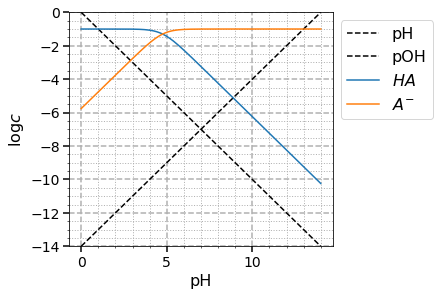

In [ ]:
acetic_acid.plot('pC', 'matplotlib')

 O diagrama $\log C$ apresenta a dependência logarítmica da concentração com o potencial hidrogeniônico. As linhas de $[H_3O^+]$ e $[OH^-]$ são retas com inclinação negativa e positiva, respectivamente, e não dependem da concentração analítica do ácido. Relembrando a relação existente entre o $pH$ e a concentração:

$$
pH = - \log [H{^+}]
$$

 Conseguimos também obter um gráfico interativo, no qual o usuário pode apresentar maior facilidade para o entendimento e leitura. Nele podemos acompanhar os dados individuais e comparar os valores de todas as espécies simultaneamente.

In [ ]:
acetic_acid.plot('pC', 'plotly')

Para obtermos o gráfico estático de Distribuição de Espécies, passamos o argumento `distribution`:

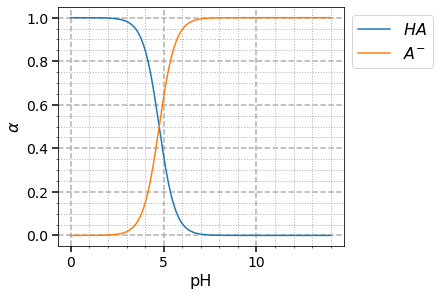

In [ ]:
acetic_acid.plot('distribution', 'matplotlib')

Para obtermos o gráfico interativo de Distribuições de Espécies basta substituir o argumento `matplotlib` por  `plotly` :

In [ ]:
acetic_acid.plot('distribution', 'plotly')

O diagrama de distribuição de espécies apresenta o grau de dissociação em função do $pH$. Sabemos que a composição de soluções de um ácido pode ser calculada com base no valor de $α$ e da concentração analítica.

A partir do gráfico acima, o que pode ser discutido com os alunos?

- Solução Tampão

Uma solução tampão resiste a mudanças no $pH$ quando ácidos ou bases são adicionados ou quando ocorre diluição. Um tampão é uma mistura de um ácido e sua base conjugada.

A principal equação para tampões é a de Henderson-Hasselbalch que se resume a um rearranjo da expressão de equilíbrio $K_a$.

$$
pH = pK_a + \log \frac {[A{^-}]}{[HA]}
$$

Geralmente se considera que a região de tamponamento é $\pm 1$ do valor de $pK_a$, tendo em vista que em tal região há concentração apreciável das duas espécies de interesse.

- Espécies Predominantes

Podemos determinar a espécie predominante na solução por meio da análise da equação de Henderson-Hasselbalch, comparando os valores de $pH$ e $pK_a$. Para um ácido monoprótico, se $pH < pK_a$ a espécie predominante será HA tendendo a ser mais ácido, e se $pH > pK_a$ a espécie predominante será $A^-$ tendendo a ser mais básico. A espécie predominante em um dado $pH$ é evidente em um diagrama de espécies.

# **Usando o pacote com exemplo de ácido diprótico**

A lógica para ácidos dipróticos permanece a mesma vista anteriormente. Usaremos como exemplo o ácido fumárico.

$$
HOOCCHCHCOOH(s) + H_2O(l) \rightleftharpoons HOOCCHCHCOO^-(aq) + H_3O^+(aq)
$$
$$
HOOCCHCHCOO^-(aq) + H_2O(l) \rightleftharpoons {}^-OOCCHCHCOO^-(aq) + H_3O^+(aq)
$$

A representação genérica para o ácido fumárico será $H_2A$ e para as espécies desprotonadas $A^-$ e $A^{2-}$, respectivamente. 



In [ ]:
fumaric_acid = Acid((3.02, 4.48), 0.1)

O $α$ e o logaritmo da concentração são facilmente confirmados:

In [ ]:
fumaric_acid.alpha

[array([9.9905e-01, 9.9880e-01, 9.9849e-01, ..., 7.9433e-21, 5.0119e-21, 3.1623e-21]),
 array([9.5408e-04, 1.2008e-03, 1.5113e-03, ..., 4.7863e-10, 3.8019e-10, 3.0200e-10]),
 array([3.1593e-08, 5.0059e-08, 7.9313e-08, ..., 1.0000e+00, 1.0000e+00, 1.0000e+00])]

Como podemos observar, a quantidade de $α$ como resposta foi superior ao do ácido acético. Claro, como estamos trabalhando com um ácido diprótico, teremos não duas, mas três espécies distintas.

In [ ]:
fumaric_acid.log_concentrations

[array([ -1.0004,  -1.0005,  -1.0007, ..., -21.1   , -21.3   , -21.5   ]),
 array([ -4.0204,  -3.9205,  -3.8207, ..., -10.32  , -10.42  , -10.52  ]),
 array([-8.5004, -8.3005, -8.1007, ..., -1.    , -1.    , -1.    ])]

Para visualizar o diagrama estático de pH$-\log C$ do ácido fumárico: 

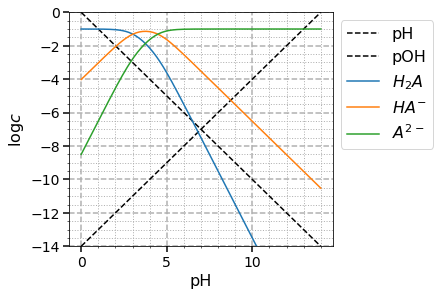

In [ ]:
fumaric_acid.plot('pC', 'matplotlib')

Para visualizar o diagrama interativo de pH$-\log C$ do ácido fumárico:

In [ ]:
fumaric_acid.plot('pC', 'plotly')

Para conseguirmos visualizar o diagrama estático de Distribuição de Espécies:

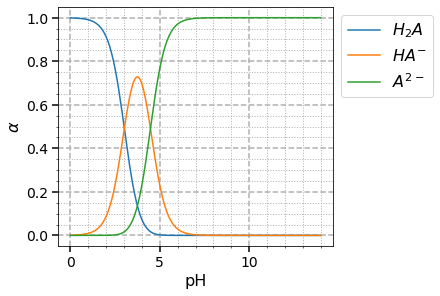

In [ ]:
fumaric_acid.plot('distribution', 'matplotlib')

Por se tratar de um ácido diprótico, teremos mais de uma região de tamponamento - o que já esperávamos. As discussões citadas previamentes como solução tampão e espécies predominantes podem ser propostas novamente.

Para o diagrama interativo de Distribuição de Espécies:

In [ ]:
fumaric_acid.plot('distribution', 'plotly')